# <center> PROJET Deep Learning 

In [3]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time


2024-06-07 22:20:08.892861: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 22:20:08.892952: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 22:20:09.023395: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Preparing the data 

To prepare the tabular data needed for the deep learning model, we will be concatinating some columns of three datasets:
- DataSetTrussStructure
- DataSetTrussStructureAplatit
- DataSetTrussStructureDeplacements

In [4]:
df = pd.read_excel("/kaggle/input/trussdataset/DataSetTrussStructure.xlsx")
df.head()

,CS1,CS2,CS3,CS4,CS5,CS6,Energie,Poids,N° image
0,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.025088,3901.671856,1
1,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.043002,3159.119087,2
2,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.021369,3575.895111,3
3,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.044654,3276.268680,4
4,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.036768,3173.978488,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CS1       2001 non-null   float64
 1   CS2       2001 non-null   float64
 2   CS3       2001 non-null   float64
 3   CS4       2001 non-null   float64
 4   CS5       2001 non-null   float64
 5   CS6       2001 non-null   float64
 6   Energie   2001 non-null   float64
 7   Poids     2001 non-null   float64
 8   N° image  2001 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 140.8 KB


In [6]:
df_cord = pd.read_excel('/kaggle/input/trussdataset/DataSetTrussStructureAplatit.xlsx')
df_cord.head()

,CX1,CX2,CX3,CX4,CY1,CY2,CY3,CY4,N° image
0,0,9.144,9.144000,0,0,0,9.144000,9.144,1
1,0,9.144,5.249471,0,0,0,0.463345,9.144,2
2,0,9.144,8.364926,0,0,0,6.571136,9.144,3
3,0,9.144,0.070916,0,0,0,7.952127,9.144,4
4,0,9.144,6.273326,0,0,0,1.815285,9.144,5


In [7]:
df_cord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CX1       2001 non-null   int64  
 1   CX2       2001 non-null   float64
 2   CX3       2001 non-null   float64
 3   CX4       2001 non-null   int64  
 4   CY1       2001 non-null   int64  
 5   CY2       2001 non-null   int64  
 6   CY3       2001 non-null   float64
 7   CY4       2001 non-null   float64
 8   N° image  2001 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 140.8 KB


In [8]:
df_dep = pd.read_excel('/kaggle/input/trussdataset/DataSetTrussStructureDeplacements.xlsx')
df_dep

,DX1,DY1,DX2,DY2,DX3,DY3,DX4,DY4,N° image
0,0,0,-0.000007,-0.000025,5.195944e-06,-1.989229e-05,0,0,1
1,0,0,-0.000009,-0.000043,-1.855864e-06,-3.920309e-08,0,0,2
2,0,0,-0.000006,-0.000021,1.822227e-06,-1.575411e-05,0,0,3
3,0,0,-0.000012,-0.000045,2.828932e-05,1.415966e-06,0,0,4
4,0,0,-0.000014,-0.000037,3.128445e-06,-5.127493e-06,0,0,5
...,...,...,...,...,...,...,...,...,...
1996,0,0,-0.000008,-0.000021,2.114104e-06,-8.535411e-06,0,0,1997
1997,0,0,-0.000009,-0.000023,1.400329e-06,-6.005413e-06,0,0,1998
1998,0,0,-0.000007,-0.000020,1.595819e-06,-1.374284e-05,0,0,1999
1999,0,0,-0.000012,-0.000045,4.560391e-07,-2.466710e-07,0,0,2000


In [9]:
df_cord.drop('N° image',axis = 1, inplace = True)

In [10]:
df_cord.head()

,CX1,CX2,CX3,CX4,CY1,CY2,CY3,CY4
0,0,9.144,9.144000,0,0,0,9.144000,9.144
1,0,9.144,5.249471,0,0,0,0.463345,9.144
2,0,9.144,8.364926,0,0,0,6.571136,9.144
3,0,9.144,0.070916,0,0,0,7.952127,9.144
4,0,9.144,6.273326,0,0,0,1.815285,9.144


In [11]:
df1 = pd.concat([df_cord[["CX3","CY3"]], df_dep[["DX2","DY2","DX3","DY3"]], df[['Energie','Poids']]] , axis = 1)

In [12]:
df1

,CX3,CY3,DX2,DY2,DX3,DY3,Energie,Poids
0,9.144000,9.144000,-0.000007,-0.000025,5.195944e-06,-1.989229e-05,0.025088,3901.671856
1,5.249471,0.463345,-0.000009,-0.000043,-1.855864e-06,-3.920309e-08,0.043002,3159.119087
2,8.364926,6.571136,-0.000006,-0.000021,1.822227e-06,-1.575411e-05,0.021369,3575.895111
3,0.070916,7.952127,-0.000012,-0.000045,2.828932e-05,1.415966e-06,0.044654,3276.268680
4,6.273326,1.815285,-0.000014,-0.000037,3.128445e-06,-5.127493e-06,0.036768,3173.978488
...,...,...,...,...,...,...,...,...
1996,5.756883,6.562562,-0.000008,-0.000021,2.114104e-06,-8.535411e-06,0.021233,3352.060281
1997,3.953545,7.744363,-0.000009,-0.000023,1.400329e-06,-6.005413e-06,0.023403,3338.811195
1998,7.780071,5.773025,-0.000007,-0.000020,1.595819e-06,-1.374284e-05,0.020354,3456.720204
1999,6.260205,0.847129,-0.000012,-0.000045,4.560391e-07,-2.466710e-07,0.044875,3182.877027


### Normalization of the features

In [13]:
# Separate features and targets
X = df1.drop(["Energie", "Poids"], axis = 1)
y = df1[["Energie", "Poids"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[-0.61874911,  1.17365101, -0.12682423,  0.71659316, -0.43402135,
         0.33686559],
       [ 0.69779039, -0.09888312,  0.43603681,  1.01667219,  0.00571022,
        -0.55044605],
       [ 0.31574327,  1.28345396,  0.82603364,  1.02416328, -0.19066   ,
        -0.60479372],
       ...,
       [-1.34947571, -1.18347832, -0.29042582, -1.37992184, -1.19438004,
         1.05878437],
       [-0.03591328,  0.5998944 ,  0.04331636,  0.8510323 , -0.04901454,
         0.14786366],
       [-0.98159039,  1.14272098, -0.49901878,  0.46541533, -0.27559786,
         0.70228552]])

In [15]:
X_train.shape

(1600, 6)

# Deep Neural Network

In this part, we will be training a deep neural network using tensorflow and keras library, we will first work with a non normalized target appraoch. Then we will apply a Z-score normalization and compare the performances of the two models  

## DNN without target normalisation

In [16]:
%%time

# Define the model
non_normalized_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2)  # Output layer with 2 neurons (one for each target variable)
])

# Compile the model
non_normalized_model.compile(optimizer='adam', loss='mean_squared_error')

begin = time.time()
# Train the model
history_non_normalized_model = non_normalized_model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))
end = time.time()

non_normalized_model_time = end - begin
print(f"The excecution time required is {non_normalized_model_time:.2f} seconds")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
 70/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5321300.0000

I0000 00:00:1717798831.665543     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 5282253.0000 - val_loss: 3838884.5000
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2108009.0000 - val_loss: 227767.7969
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177523.9062 - val_loss: 66567.0703
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51220.9648 - val_loss: 27978.7988
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22035.5195 - val_loss: 15684.4355
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12139.6963 - val_loss: 9559.9639
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6516.2134 - val_loss: 6414.9102
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4796.5254 - val_loss: 4601.9385
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3291.3022 - val_loss: 3502.3235
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3003.3906 - val_loss: 3012.9709
The excecution time required is 8.46 seconds
CPU times: user 8.02 s, sy

In [17]:

non_normalized_model1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2)  # Output layer with 2 neurons (one for each target variable)
])

# Compile the model
non_normalized_model1.compile(optimizer='adam', loss='mean_squared_error')

begin = time.time()
# Augmenting the batch size to 32 
history_non_normalized_model1 = non_normalized_model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
end = time.time()

non_normalized_model_time1 = end - begin
print(f"The excecution time required is {non_normalized_model_time1:.2f} seconds")

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 5343188.5000 - val_loss: 5240763.0000
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5098579.5000 - val_loss: 3741521.5000
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2682243.0000 - val_loss: 427360.4375
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 387896.4375 - val_loss: 242291.2969
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 216840.6094 - val_loss: 139581.7031
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 123817.4062 - val_loss: 81231.5078
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74322.4922 - val_loss: 50582.6289
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43908.0898 - val_loss: 34755.9414
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29487.3711 - val_loss: 25029.5332
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19210.4238 - val_loss: 18450.5117
The excecution time required is 4.44 seconds


A less batch size gave better results but took more time to do so 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


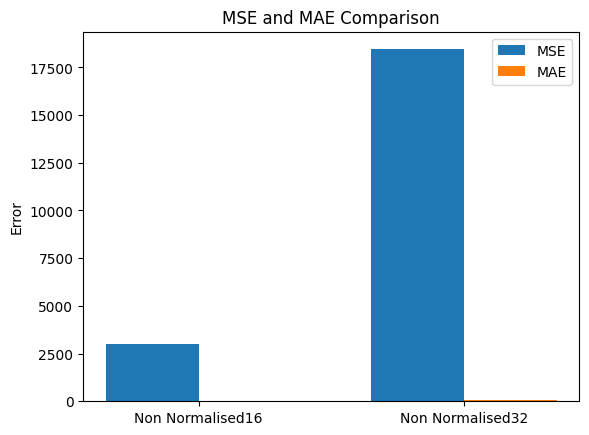

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate MSE and MAE for each model
mse_non_normalized_model = mean_squared_error(y_test, non_normalized_model.predict(X_test))
mae_non_normalized_model = mean_absolute_error(y_test, non_normalized_model.predict(X_test))

mse_non_normalized_model1 = mean_squared_error(y_test, non_normalized_model1.predict(X_test))
mae_non_normalized_model1 = mean_absolute_error(y_test, non_normalized_model1.predict(X_test))

# Create bar plot
models = ['Non Normalised16', 'Non Normalised32']
mse_values = [mse_non_normalized_model, mse_non_normalized_model1]
mae_values = [mae_non_normalized_model, mae_non_normalized_model1]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, mse_values, width, label='MSE')
bars2 = ax.bar(x + width/2, mae_values, width, label='MAE')

ax.set_ylabel('Error')
ax.set_title('MSE and MAE Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()


## DNN with target normalization

Due to the difference between the scales of the target columns "Energy" and "Poids". We will be using Z-score standarization to bring the two target to the same scale so it wouldnt affect our loss function calculation.


In [19]:
scaler = StandardScaler()
y_train_scaled= scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [20]:
y_train_scaled

array([[-0.71659316,  0.10405423],
       [-1.01667219, -0.04219047],
       [-1.02416328,  1.0165848 ],
       ...,
       [ 1.37992184, -1.11343076],
       [-0.8510323 , -0.1114078 ],
       [-0.46541533, -0.08943354]])

### normalized model with 4 hidden layers

In [21]:
# Define the model
normalized_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2)  # Output layer with 2 neurons (one for each target variable)
])

# Compile the model
normalized_model.compile(optimizer='adam', loss='mean_squared_error')

begin = time.time()
# Train the model
history_normalized_model = normalized_model.fit(X_train, y_train_scaled, epochs=10, batch_size=16, validation_data=(X_test, y_test_scaled))
end = time.time()

normalized_model_time = end - begin
print(f"The excecution time required is {normalized_model_time:.2f} seconds")

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5143 - val_loss: 0.0044
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7850e-04 - val_loss: 5.7344e-04
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3648e-04 - val_loss: 5.0418e-04
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2681e-04 - val_loss: 5.7731e-04
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5687e-04 - val_loss: 2.4549e-04
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7522e-04 - val_loss: 2.0240e-04
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6538e-04 - val_loss: 1.7539e-04
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9150e-04 - val_loss: 3.1423e-04
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5150e-04 - val_loss: 5.4716e-04
The excecution time required is 6.82 seconds


### normalized model with 3 hidden layers

In [25]:
# Define the model
normalized_model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2)  # Output layer with 2 neurons (one for each target variable)
])

# Compile the model
normalized_model1.compile(optimizer='adam', loss='mean_squared_error')

begin = time.time()
# Train the model
history_normalized_model1 = normalized_model1.fit(X_train, y_train_scaled, epochs=10, batch_size=16, validation_data=(X_test, y_test_scaled))
end = time.time()

normalized_model1_time = end - begin
print(f"The excecution time required is {normalized_model1_time:.2f} seconds")

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4922 - val_loss: 0.0132
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088 - val_loss: 0.0035
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9912e-04 - val_loss: 9.3021e-04
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8588e-04 - val_loss: 5.2083e-04
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2859e-04 - val_loss: 4.0200e-04
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6634e-04 - val_loss: 6.4221e-04
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2267e-04 - val_loss: 3.8588e-04
The excecution time required is 4.84 seconds


### normalized model 4 hidden layers v2

In [26]:
# Define the model
normalized_model2 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2)  # Output layer with 2 neurons (one for each target variable)
])

# Compile the model
normalized_model2.compile(optimizer='adam', loss='mean_squared_error')

begin = time.time()
# Train the model
history_normalized_model2 = normalized_model2.fit(X_train, y_train_scaled, epochs=10, batch_size=16, validation_data=(X_test, y_test_scaled))
end = time.time()

normalized_model2_time = end - begin
print(f"The excecution time required is {normalized_model_time:.2f} seconds")

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.3611 - val_loss: 0.0037
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - val_loss: 8.5920e-04
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9799e-04 - val_loss: 7.5914e-04
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1759e-04 - val_loss: 5.0676e-04
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2921e-04 - val_loss: 6.8988e-04
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2832e-04 - val_loss: 7.2826e-04
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4381e-04 - val_loss: 3.3883e-04
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7185e-04 - val_loss: 0.0010
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8709e-04 - val_loss: 0.0011
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7326e-04 - val_loss: 0.0010
The excecution time required is 6.82 seconds


In [27]:
def plot_comparison(models,models_name):
    MSE,MAE = [],[]
    for model in models:
        mse = mean_squared_error(y_test_scaled, model.predict(X_test))
        mae = mean_absolute_error(y_test_scaled, model.predict(X_test))
        MSE.append(mse)
        MAE.append(mae)

    x = np.arange(len(models))
    width = 0.2

    fig, ax = plt.subplots()
    bars1 = ax.bar(x - width/2,  MSE, width, label='MSE')
    bars2 = ax.bar(x + width/2, MAE, width, label='MAE')

    ax.set_ylabel('Error')
    ax.set_title('MSE and MAE Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(models_name)
    ax.legend()

    plt.show()
    

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


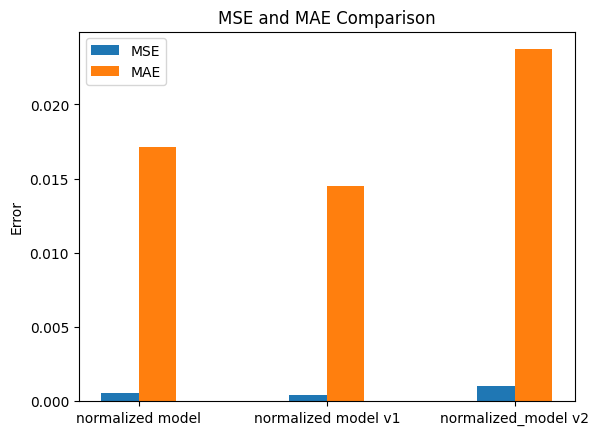

In [83]:
models = [normalized_model,normalized_model1,normalized_model2]
models_name = ["normalized model","normalized model v1","normalized_model v2"]

plot_comparison(models,models_name)

In [29]:
normalized_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,384 (138.22 KB)

 Trainable params: 11,794 (46.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,590 (92.15 KB)

In [30]:
normalized_model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 3,090 (12.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,182 (24.15 KB)

In [31]:
normalized_model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 256)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,272 (528.41 KB)

 Trainable params: 45,090 (176.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 90,182 (352.28 KB)

In [32]:
y_pred_train = normalized_model.predict(X_train)
y_pred_test = normalized_model.predict(X_test)

y_train_inv = scaler.inverse_transform(y_train)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_train_inv = scaler.inverse_transform(y_pred_train)
y_pred_test_inv = scaler.inverse_transform(y_pred_test)

# Print evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_train = mean_squared_error(y_train_inv, y_pred_train_inv)
mae_train = mean_absolute_error(y_train_inv, y_pred_train_inv)
mse_test = mean_squared_error(y_test_inv, y_pred_test_inv)
mae_test = mean_absolute_error(y_test_inv, y_pred_test_inv)

print(f"Train MSE: {mse_train:.4f}, Train MAE: {mae_train:.4f}")
print(f"Test MSE: {mse_test:.4f}, Test MAE: {mae_test:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Train MSE: 165588756414.7339, Train MAE: 287325.4001
Test MSE: 165256235041.6621, Test MAE: 287065.4074


In [23]:
y

,Energie,Poids
0,0.025088,3901.671856
1,0.043002,3159.119087
2,0.021369,3575.895111
3,0.044654,3276.268680
4,0.036768,3173.978488
...,...,...
1996,0.021233,3352.060281
1997,0.023403,3338.811195
1998,0.020354,3456.720204
1999,0.044875,3182.877027


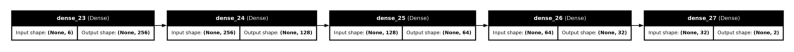

In [33]:
from keras.utils import plot_model

# Visualize the model
plot_model(normalized_model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True, rankdir='LR')

# Display the image
img = plt.imread('model_plot.png')
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


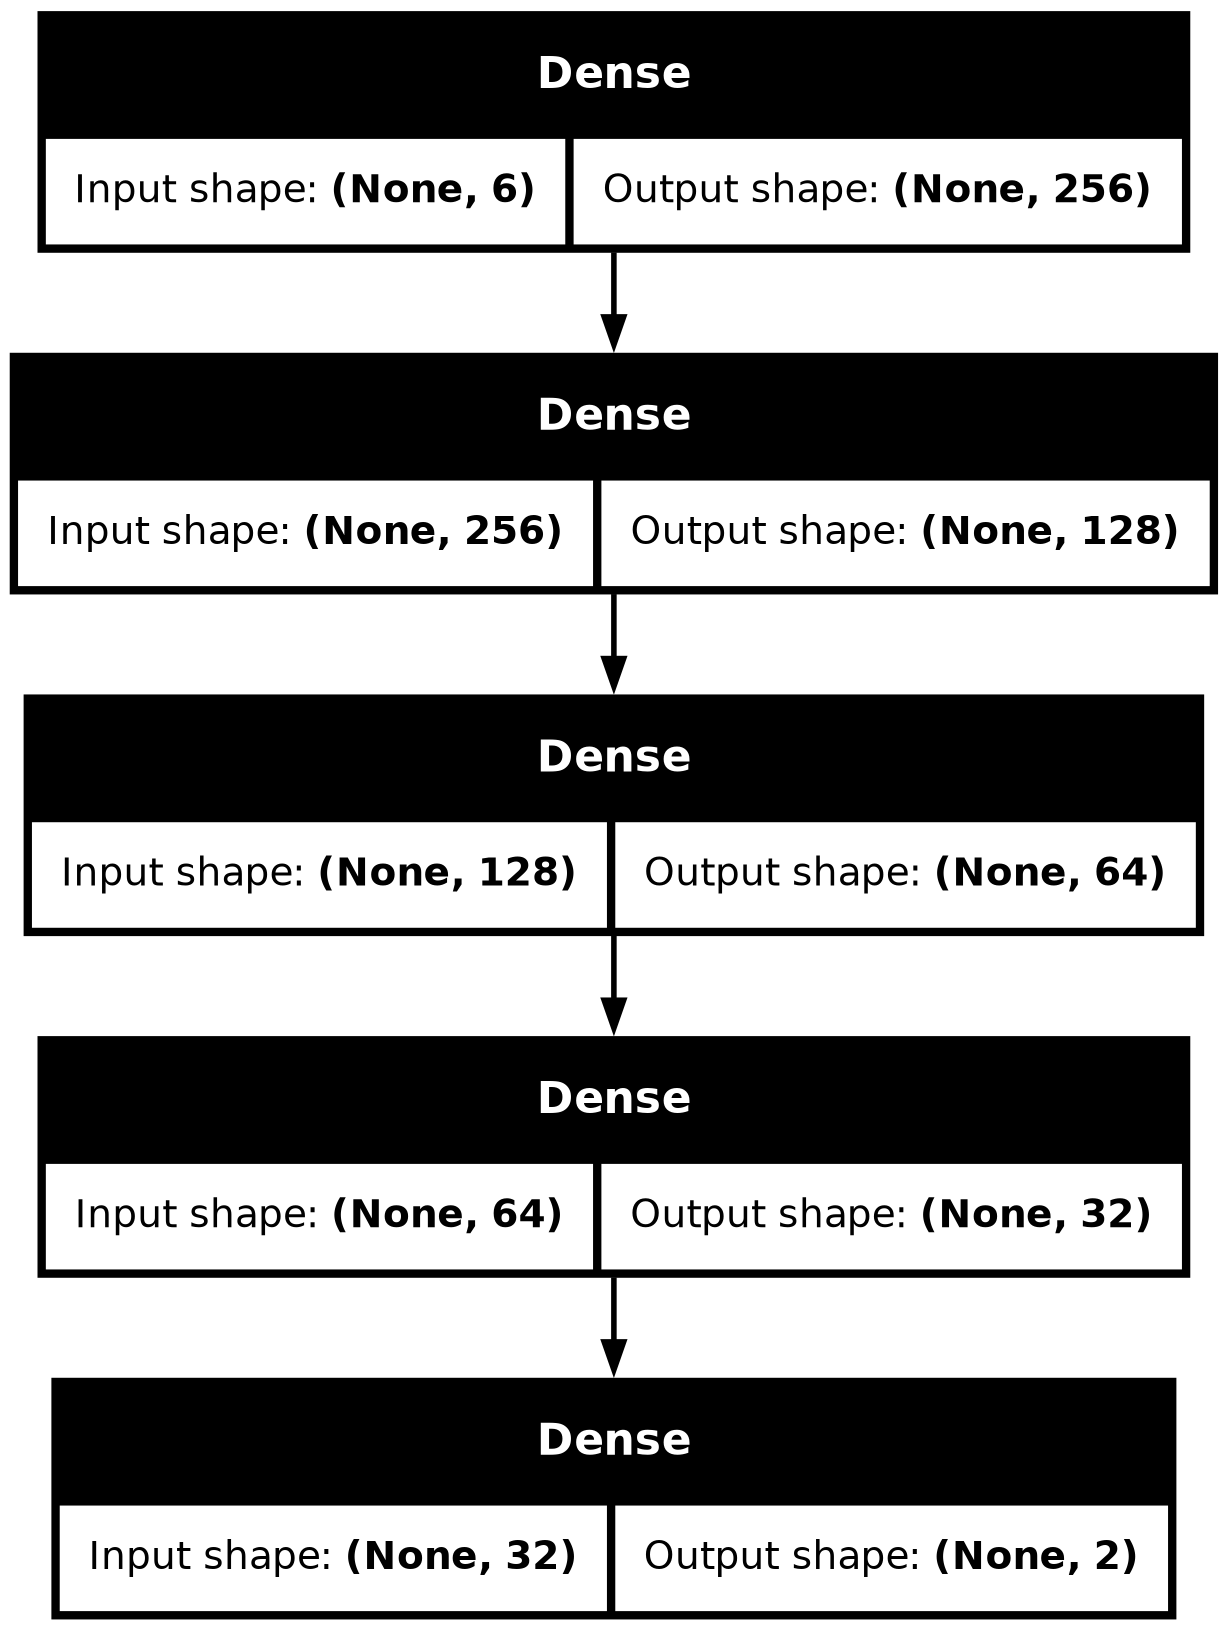

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(normalized_model2, show_shapes = True)

In [36]:
# Evaluate the model
loss = normalized_model2.evaluate(X_test, y_test_scaled)
print(f"Test loss: {loss}")

# Make predictions
y_pred = normalized_model2.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dense = mean_absolute_error(y_test_scaled, y_pred)
print(f"Mean Absolute Error (MAE): {mae_dense}")

# Calculate Mean Squared Error (MSE)
mse_dense = mean_squared_error(y_test_scaled, y_pred)
print(f"Mean Squared Error (MSE): {mse_dense}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 
Test loss: 0.0010124394902959466
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Absolute Error (MAE): 0.023724740186721265
Mean Squared Error (MSE): 0.001012439271728396


In [38]:
def plot_model_loss(model_history, model_name):
    
    # Plot training & validation loss values
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title(f'{model_name} loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


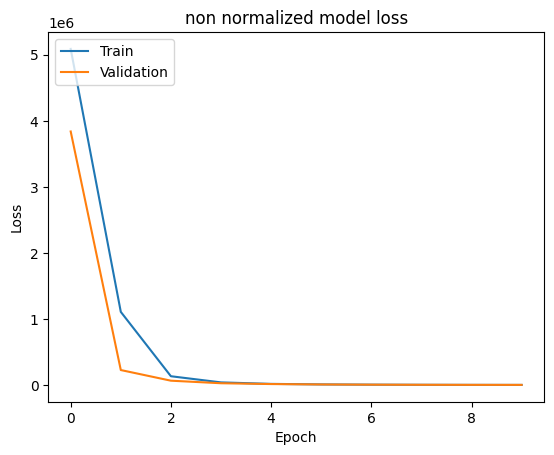

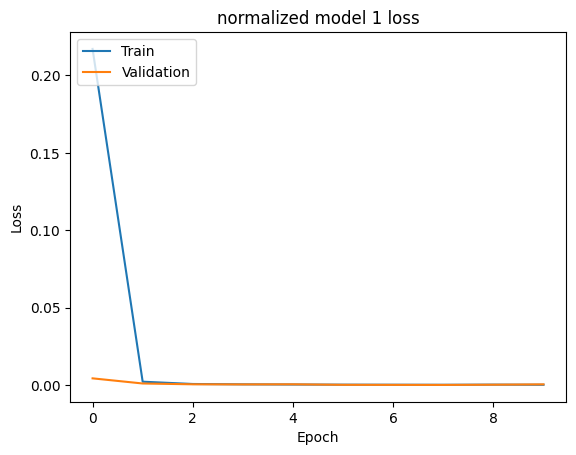

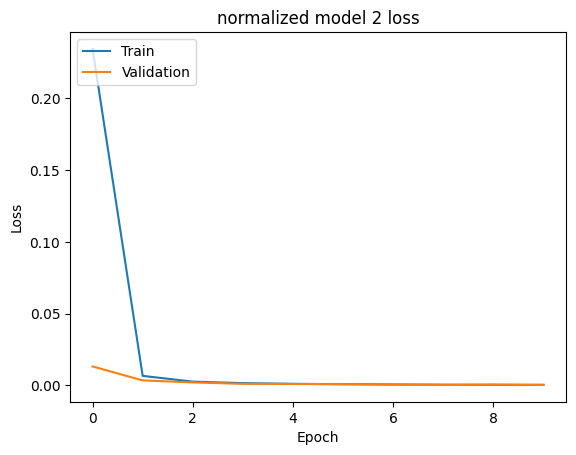

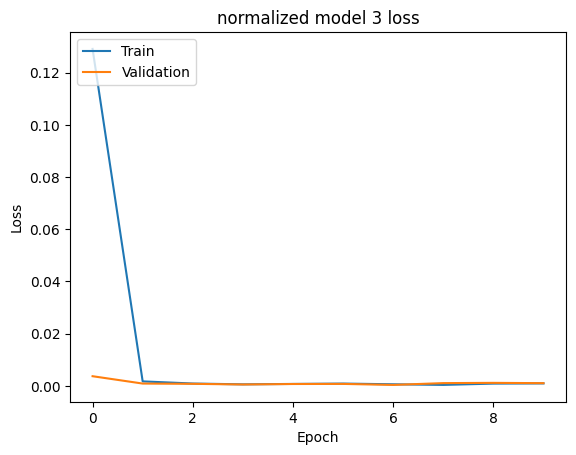

In [42]:
models_history = [history_non_normalized_model,history_normalized_model,history_normalized_model1,history_normalized_model2]
model_names = ["non normalized model",'normalized model 1', 'normalized model 2', 'normalized model 3']

for (model_history, model_name) in zip(models_history,model_names):
    plot_model_loss(model_history, model_name)

## Prediction using CNN and image data 

In [43]:
import cv2

image_path = '/kaggle/input/trussimages/Images'
image_files = os.listdir(image_path)

In [44]:
sorted_image_files = sorted(image_files, key=lambda x: int(x.split('.')[0][5:]))


In [45]:
path = os.path.join(image_path,sorted_image_files[0])
im = cv2.imread(path)

# Check image shape
height, width, channels = im.shape

print(f"Image shape: Height={height}, Width={width}, Channels={channels}")


Image shape: Height=300, Width=300, Channels=3


In [46]:

def preprocess_image(img):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100), interpolation=cv2.INTER_AREA)
    img = img / 255.0     #normalization of the images 
    return img

images = []
for image in sorted_image_files:
    image = os.path.join(image_path, image)
    image = preprocess_image(image)
    images.append(image)

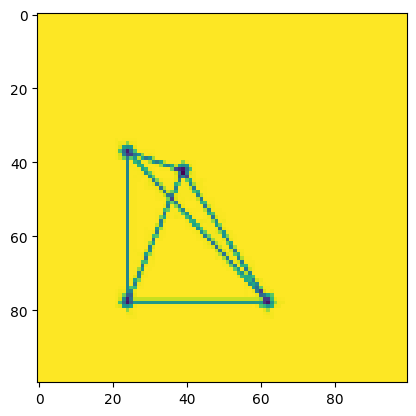

In [47]:
plt.imshow(images[10])

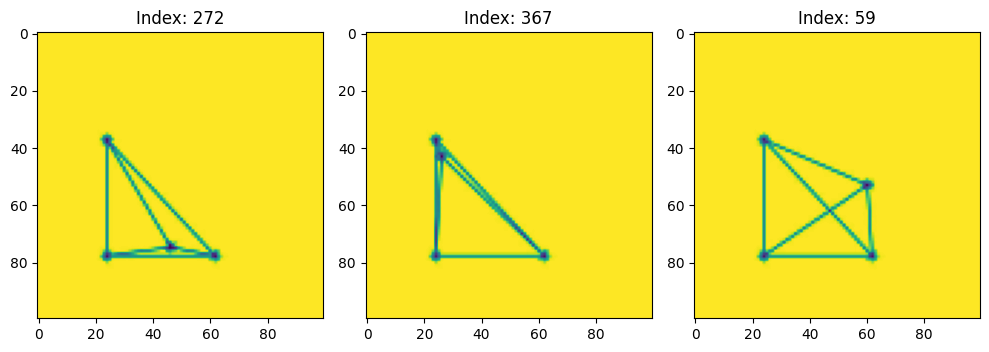

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(10, 7))
axes = axes.flatten()

for i in range(3):  
    index = np.random.randint(0, len(images) - 1) 
    axes[i].imshow(images[index])
    axes[i].set_title(f"Index: {index}")

plt.tight_layout()
plt.show()


In [49]:
X_images = np.array(images).reshape(-1, 100, 100, 1)
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_images, y, test_size=0.2, random_state=42)

# Split dataset into training and testing sets
scaler = StandardScaler()
y_train_cnn = scaler.fit_transform(y_train_cnn)
y_test_cnn = scaler.transform(y_test_cnn)

In [50]:
X_train_cnn.shape

(1600, 100, 100, 1)

In [51]:
images[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

### Vanilla CNN

In [53]:
# Define the CNN model
model_cnn = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(2)  # Two outputs for multi-output regression
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


# Train the model
history_cnn = model_cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=16, validation_data=(X_test_cnn, y_test_cnn))

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.9375 - mean_squared_error: 0.9375 - val_loss: 0.0856 - val_mean_squared_error: 0.0856
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_los

### CNN plus Dense blocks 

In [63]:
# Define the CNN model
model_cnn1 = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Adding the layers of the normalized model 2
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2)  
])

# Compile the model
model_cnn1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


# Train the model
history_cnn1 = model_cnn1.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=16, validation_data=(X_test_cnn, y_test_cnn))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
 15/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.1505 - mean_squared_error: 1.1505

W0000 00:00:1717801414.927557     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0365 - mean_squared_error: 1.0365

W0000 00:00:1717801416.455218     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 1.0358 - mean_squared_error: 1.0358 - val_loss: 0.9552 - val_mean_squared_error: 0.9552
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7194 - mean_squared_error: 0.7194 - val_loss: 0.0655 - val_mean_squared_error: 0.0655
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0101 -

### Using Leaky ReLU

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

# Define the CNN model with Leaky ReLU activation
model_cnn = Sequential([
    Conv2D(128, (3, 3), input_shape=(100, 100, 1)),
    LeakyReLU(alpha=0.01),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3)),
    LeakyReLU(alpha=0.01),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3)),
    LeakyReLU(alpha=0.01),
    MaxPooling2D((2, 2)),
    Flatten(),
    LeakyReLU(alpha=0.01),
    Dense(2)  # Two outputs for multi-output regression
])

# Compile the model
model_cnn.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history_cnn = model_cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=16, validation_data=(X_test_cnn, y_test_cnn))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.8266 - mean_squared_error: 0.8266 - val_loss: 0.0837 - val_mean_squared_error: 0.0837
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0542 - mean_squared_error: 0.0542 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_los

### Using ResNEt architecture 

In [62]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, Activation, Add, Flatten
from tensorflow.keras.models import Model

def build_resnet(input_shape=(100,100,1)):
    def resnet_block(x, filters, kernel_size=3, stride=1):
        shortcut = x
        x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
        x = BatchNormalization()(x)
        if stride != 1:
            shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
            shortcut = BatchNormalization()(shortcut)
        x = Add()([x, shortcut])
        x = Activation('relu')(x)
        return x
    
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, stride=2)
    x = resnet_block(x, 128)
    x = resnet_block(x, 256, stride=2)
    x = resnet_block(x, 256)
    x = resnet_block(x, 512, stride=2)
    x = resnet_block(x, 512)
    x = Flatten()(x)
    
    output = Dense(2)(x) 
    
    model = Model(inputs,  output)
    return model

# Example for AlexNet
input_shape = (100, 100, 1)  # Adjusted for grayscale
model_resnet = build_resnet()

# Compile the model
model_resnet.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history_model_resnet= model_resnet.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=16, validation_data=(X_test_cnn, y_test_cnn))

Epoch 1/10
  5/100 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 661.4571 - mean_absolute_error: 16.9025

W0000 00:00:1717801239.629200     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 119.5633 - mean_absolute_error: 4.2221

W0000 00:00:1717801243.879025     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - loss: 117.7851 - mean_absolute_error: 4.1670 - val_loss: 1.4645 - val_mean_absolute_error: 0.9478
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0774 - mean_absolute_error: 0.2056 - val_loss: 1.8278 - val_mean_absolute_error: 1.0269
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0438 - mean_absolute_error: 0.1605 - val_loss: 2.0657 - val_mean_absolute_error: 1.0832
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.1493 - val_loss: 2.1221 - val_mean_absolute_error: 1.0984
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0320 - mean_absolute_error: 0.1419 - val_loss: 2.0389 - val_mean_absolute_error: 1.0703
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0302 - mean_absolute_error: 0.1330 - val_loss: 1.4838 - val_mean_absolute_error: 0.9359
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0684 - mean_absolute_error: 0.2112 - va

In [55]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.applications import ResNet50
# Define ResNet model
input_tensor = Input(shape=(100, 100, 1))  # Define input shape
resnet_base = ResNet50(include_top=False, input_tensor=input_tensor, weights=None)  # Using weights=None to not load pre-trained weights

# Add custom layers on top of ResNet
x = resnet_base.output
x = GlobalAveragePooling2D()(x)
output = Dense(2)(x)  # Two outputs for multi-output regression

model_resnet = Model(inputs=resnet_base.input, outputs=output)

# Compile the model
model_resnet.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history_resnet = model_resnet.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=16, validation_data=(X_test_cnn, y_test_cnn))

Epoch 1/10
  2/100 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 4.1216 - mean_absolute_error: 1.7472    

W0000 00:00:1717799940.468579     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.6272 - mean_absolute_error: 0.9214

W0000 00:00:1717799950.858804     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 142ms/step - loss: 1.6187 - mean_absolute_error: 0.9186 - val_loss: 1.2615 - val_mean_absolute_error: 1.0013
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.1555 - mean_absolute_error: 0.2931 - val_loss: 2.8987 - val_mean_absolute_error: 1.4682
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0520 - mean_absolute_error: 0.1861 - val_loss: 1.5230 - val_mean_absolute_error: 1.1087
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0966 - mean_absolute_error: 0.2568 - val_loss: 6.6333 - val_mean_absolute_error: 2.3683
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.1477 - mean_absolute_error: 0.3137 - val_loss: 2.4413 - val_mean_absolute_error: 1.3556
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0523 - mean_absolute_error: 0.1733 - val_loss: 2.7358 - val_mean_absolute_error: 1.4424
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0272 - mean_absolute_error: 0.1325 - val

In [56]:
model_resnet.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 106, 106,  │          0 │ input_layer_9[0]… │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 50, 50,    │      3,200 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 50, 50,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 50, 50,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 52, 52,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 25, 25,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 25, 25,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 25, 25,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 25, 25,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 25, 25,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 25, 25,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 25, 25,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 25, 25,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 25, 25,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 25, 25,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 25, 25,    │      1,024 │ conv2_block1_3_c

 Total params: 70,650,376 (269.51 MB)

 Trainable params: 23,532,418 (89.77 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,064,838 (179.54 MB)

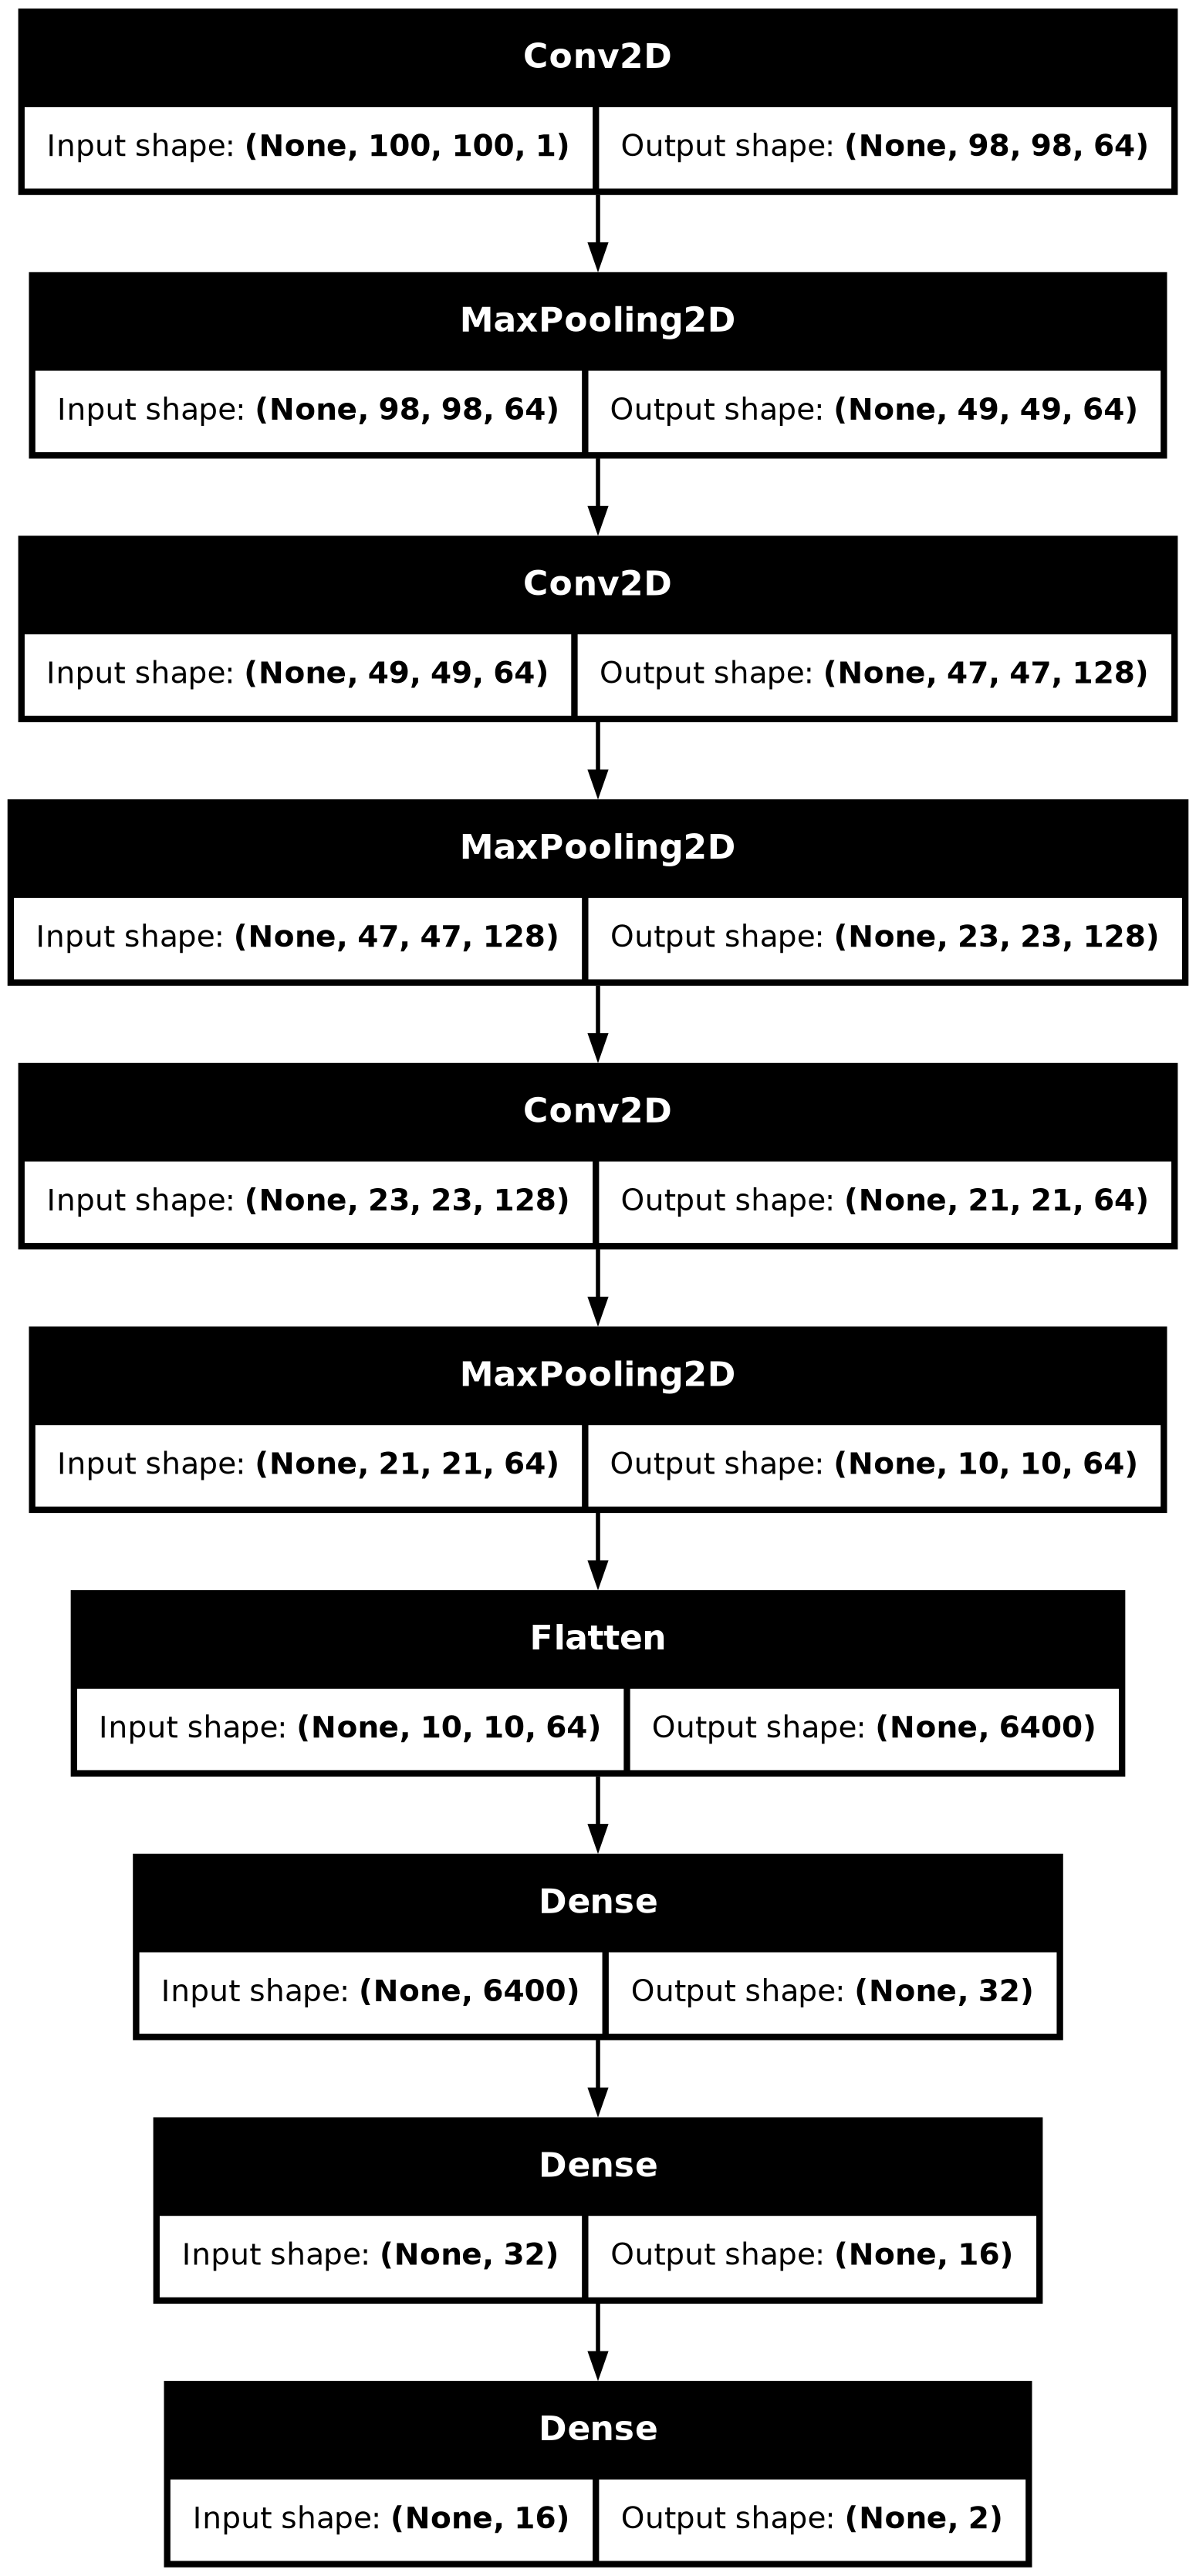

In [47]:
from tensorflow.keras.utils import plot_model

plot_model(model_cnn, show_shapes = True)

### VGG Net

In [57]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.applications import VGG16

# Define VGG16 model
input_tensor = Input(shape=(100, 100, 1))  # Define input shape

# Since VGG16 expects 3-channel input, we need to adjust the input tensor
# We use Conv2D to convert the single channel input to 3-channel input
from tensorflow.keras.layers import Conv2D
input_tensor_3ch = Conv2D(3, (3, 3), padding='same')(input_tensor)

vgg_base = VGG16(include_top=False, input_tensor=input_tensor_3ch, weights=None)  # Using weights=None to not load pre-trained weights

# Add custom layers on top of VGG16
x = vgg_base.output
x = GlobalAveragePooling2D()(x)
output = Dense(2)(x)  # Two outputs for multi-output regression

model_vgg = Model(inputs=vgg_base.input, outputs=output)

# Compile the model
model_vgg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history_vgg = model_vgg.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=16, validation_data=(X_test_cnn, y_test_cnn))


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 93ms/step - loss: 1.4620 - mean_absolute_error: 0.9450 - val_loss: 0.9607 - val_mean_absolute_error: 0.8457
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 1.0156 - mean_absolute_error: 0.8571 - val_loss: 0.9605 - val_mean_absolute_error: 0.8450
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.9632 - mean_absolute_error: 0.8399 - val_loss: 0.9607 - val_mean_absolute_error: 0.8455
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 1.0225 - mean_absolute_error: 0.8676 - val_loss: 0.9608 - val_mean_absolute_error: 0.8458
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.9841 - mean_absolute_error: 0.8494 - val_loss: 0.9607 - val_mean_absolute_error: 0.8456
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 1.0220 - mean_absolute_error: 0.8597 - val_loss: 0.9609 - val_mean_absolute_error: 0.8458
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 1.0120 - mean_absolute_error: 0.

In [49]:
# To make predictions
y_pred = model_cnn.predict(X_test)

# Inverse transform the predictions
y_pred = scaler.inverse_transform(y_pred)

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  

W0000 00:00:1717686913.233959     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


W0000 00:00:1717686913.605309     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [50]:
# Evaluate the model
loss = model_cnn.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

# Make predictions
y_pred = model_cnn.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Test loss: [0.002122094389051199, 0.002122094389051199]
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Absolute Error (MAE): 0.027558794077644812
Mean Squared Error (MSE): 0.002122094386076775


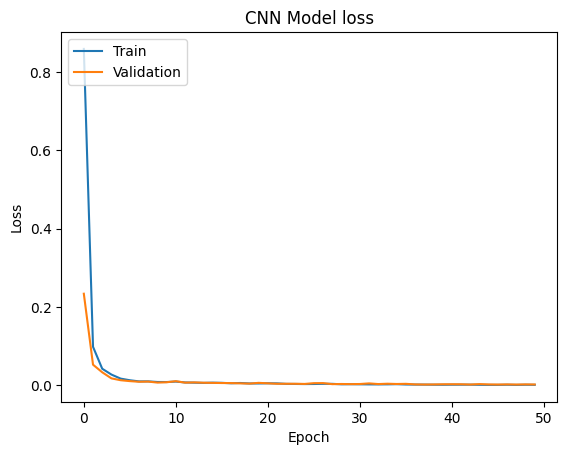

In [51]:
# Plot training & validation loss values
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Merged Model 10 epochs 

In [88]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, concatenate
from tensorflow.keras.models import Model

# Split the dataset into training and testing sets
X_train_img, X_test_img, X_train_tab, X_test_tab, y_train, y_test = train_test_split(X_images, X, y, test_size=0.2, random_state=42)

# Standardize the target values
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

X_train_tab = scaler.fit_transform(X_train_tab)
X_test_tab = scaler.transform(X_test_tab)

# Define the image input
image_input = Input(shape=(100, 100, 1), name='image_input')

# Image processing through Conv2D layers
x = Conv2D(32, (3, 3), activation='relu')(image_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

# Define the tabular input
tabular_input = Input(shape=(X_train_tab.shape[1],), name='tabular_input')

# Concatenate image and tabular data
combined = concatenate([x, tabular_input])

# Further processing with Dense layers
combined = Dense(256, activation='relu')(combined)
combined = Dense(16, activation='relu')(combined)
combined = Dense(64, activation='relu')(combined)
combined = Dense(32, activation='relu')(combined)
output = Dense(2, activation='linear')(combined)

# Define the model
model_merge = Model(inputs=[image_input, tabular_input], outputs=output)

# Compile the model
model_merge.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history_model_merge = model_merge.fit([X_train_img, X_train_tab], y_train, epochs=10, batch_size=32, validation_data=([X_test_img, X_test_tab], y_test))


Epoch 1/10
16/50 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4013 - mean_squared_error: 3.4013

W0000 00:00:1717802722.294773     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2143 - mean_squared_error: 2.2143

W0000 00:00:1717802723.262159     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.1003 - mean_squared_error: 2.1003 - val_loss: 0.5231 - val_mean_squared_error: 0.5231
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2811 - mean_squared_error: 0.2811 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0037 - val_mean_squa

### Merged Model 50 Epochs 

In [94]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, concatenate
from tensorflow.keras.models import Model

# Split the dataset into training and testing sets
X_train_img, X_test_img, X_train_tab, X_test_tab, y_train, y_test = train_test_split(X_images, X, y, test_size=0.2, random_state=42)

# Standardize the target values
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

X_train_tab = scaler.fit_transform(X_train_tab)
X_test_tab = scaler.transform(X_test_tab)

# Define the image input
image_input = Input(shape=(100, 100, 1), name='image_input')

# Image processing through Conv2D layers
x = Conv2D(32, (3, 3), activation='relu')(image_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

# Define the tabular input
tabular_input = Input(shape=(X_train_tab.shape[1],), name='tabular_input')

# Concatenate image and tabular data
combined = concatenate([x, tabular_input])

# Further processing with Dense layers
combined = Dense(256, activation='relu')(combined)
combined = Dense(128, activation='relu')(combined)
combined = Dense(64, activation='relu')(combined)
combined = Dense(32, activation='relu')(combined)
output = Dense(2, activation='linear')(combined)

# Define the model
model_merge_50 = Model(inputs=[image_input, tabular_input], outputs=output)

begin = time.time()
# Compile the model
model_merge_50.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history_model_merge_50 = model_merge_50.fit([X_train_img, X_train_tab], y_train, epochs=50, batch_size=32, validation_data=([X_test_img, X_test_tab], y_test))
end = time.time()

time_model_merge_50 = end - begin 
print("time_model_merge_50 is ",time_model_merge_50,"seconds")

Epoch 1/50
13/50 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1336 - mean_squared_error: 1.1336

W0000 00:00:1717803131.327613     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9013 - mean_squared_error: 0.9013

W0000 00:00:1717803132.311094     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.8608 - mean_squared_error: 0.8608 - val_loss: 0.0881 - val_mean_squared_error: 0.0881
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0016 - val_mean_squa

In [105]:
# Define the model
model_merge = Model(inputs=[image_input, tabular_input], outputs=output)

begin = time.time()
# Compile the model
model_merge.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history_model_merge = model_merge.fit([X_train_img, X_train_tab], y_train, epochs=10, batch_size=32, validation_data=([X_test_img, X_test_tab], y_test))
end = time.time()

time_model_merge = end - begin 


Epoch 1/10
13/50 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0070 - mean_squared_error: 0.0070      

W0000 00:00:1717803616.776939     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0044 - mean_squared_error: 0.0044

W0000 00:00:1717803617.721318     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 7.2638e-04 - val_mean_squared_error: 7.2638e-04
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6380e-04 - mean_squared_error: 2.6380e-04 - val_loss: 1.9648e-04 - val_mean_squared_error: 1.9648e-04
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.8142e-05 - mean_squared_error: 9.8142e-05 - val_loss: 1.7041e-04 - val_mean_squared_error: 1.7041e-04
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.2024e-05 - mean_squared_error: 7.2024e-05 - val_loss: 2.3955e-04 - val_mean_squared_error: 2.3955e-04
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.4091e-04 - mean_squared_error: 1.4091e-04 - val_loss: 2.5639e-04 - val_mean_squared_error: 2.5639e-04
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1059e-04 - mean_squared_error: 1.1059e-04 - val_loss: 2.1582e-04 - val_mean_squared_error: 2.1582e-04
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [68]:
# Evaluate the model
loss = model_merge.evaluate([X_test_img, X_test_tab], y_test)
print(f"Test loss: {loss}")

# Make predictions
y_pred = model_merge.predict([X_test_img, X_test_tab])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6051e-04 - mean_squared_error: 6.6051e-04 
Test loss: [0.0007506076944991946, 0.0007506076944991946]
 1/13 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step

W0000 00:00:1717802187.292228     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Mean Absolute Error (MAE): 0.020097298809625862
Mean Squared Error (MSE): 0.0007506077913472162


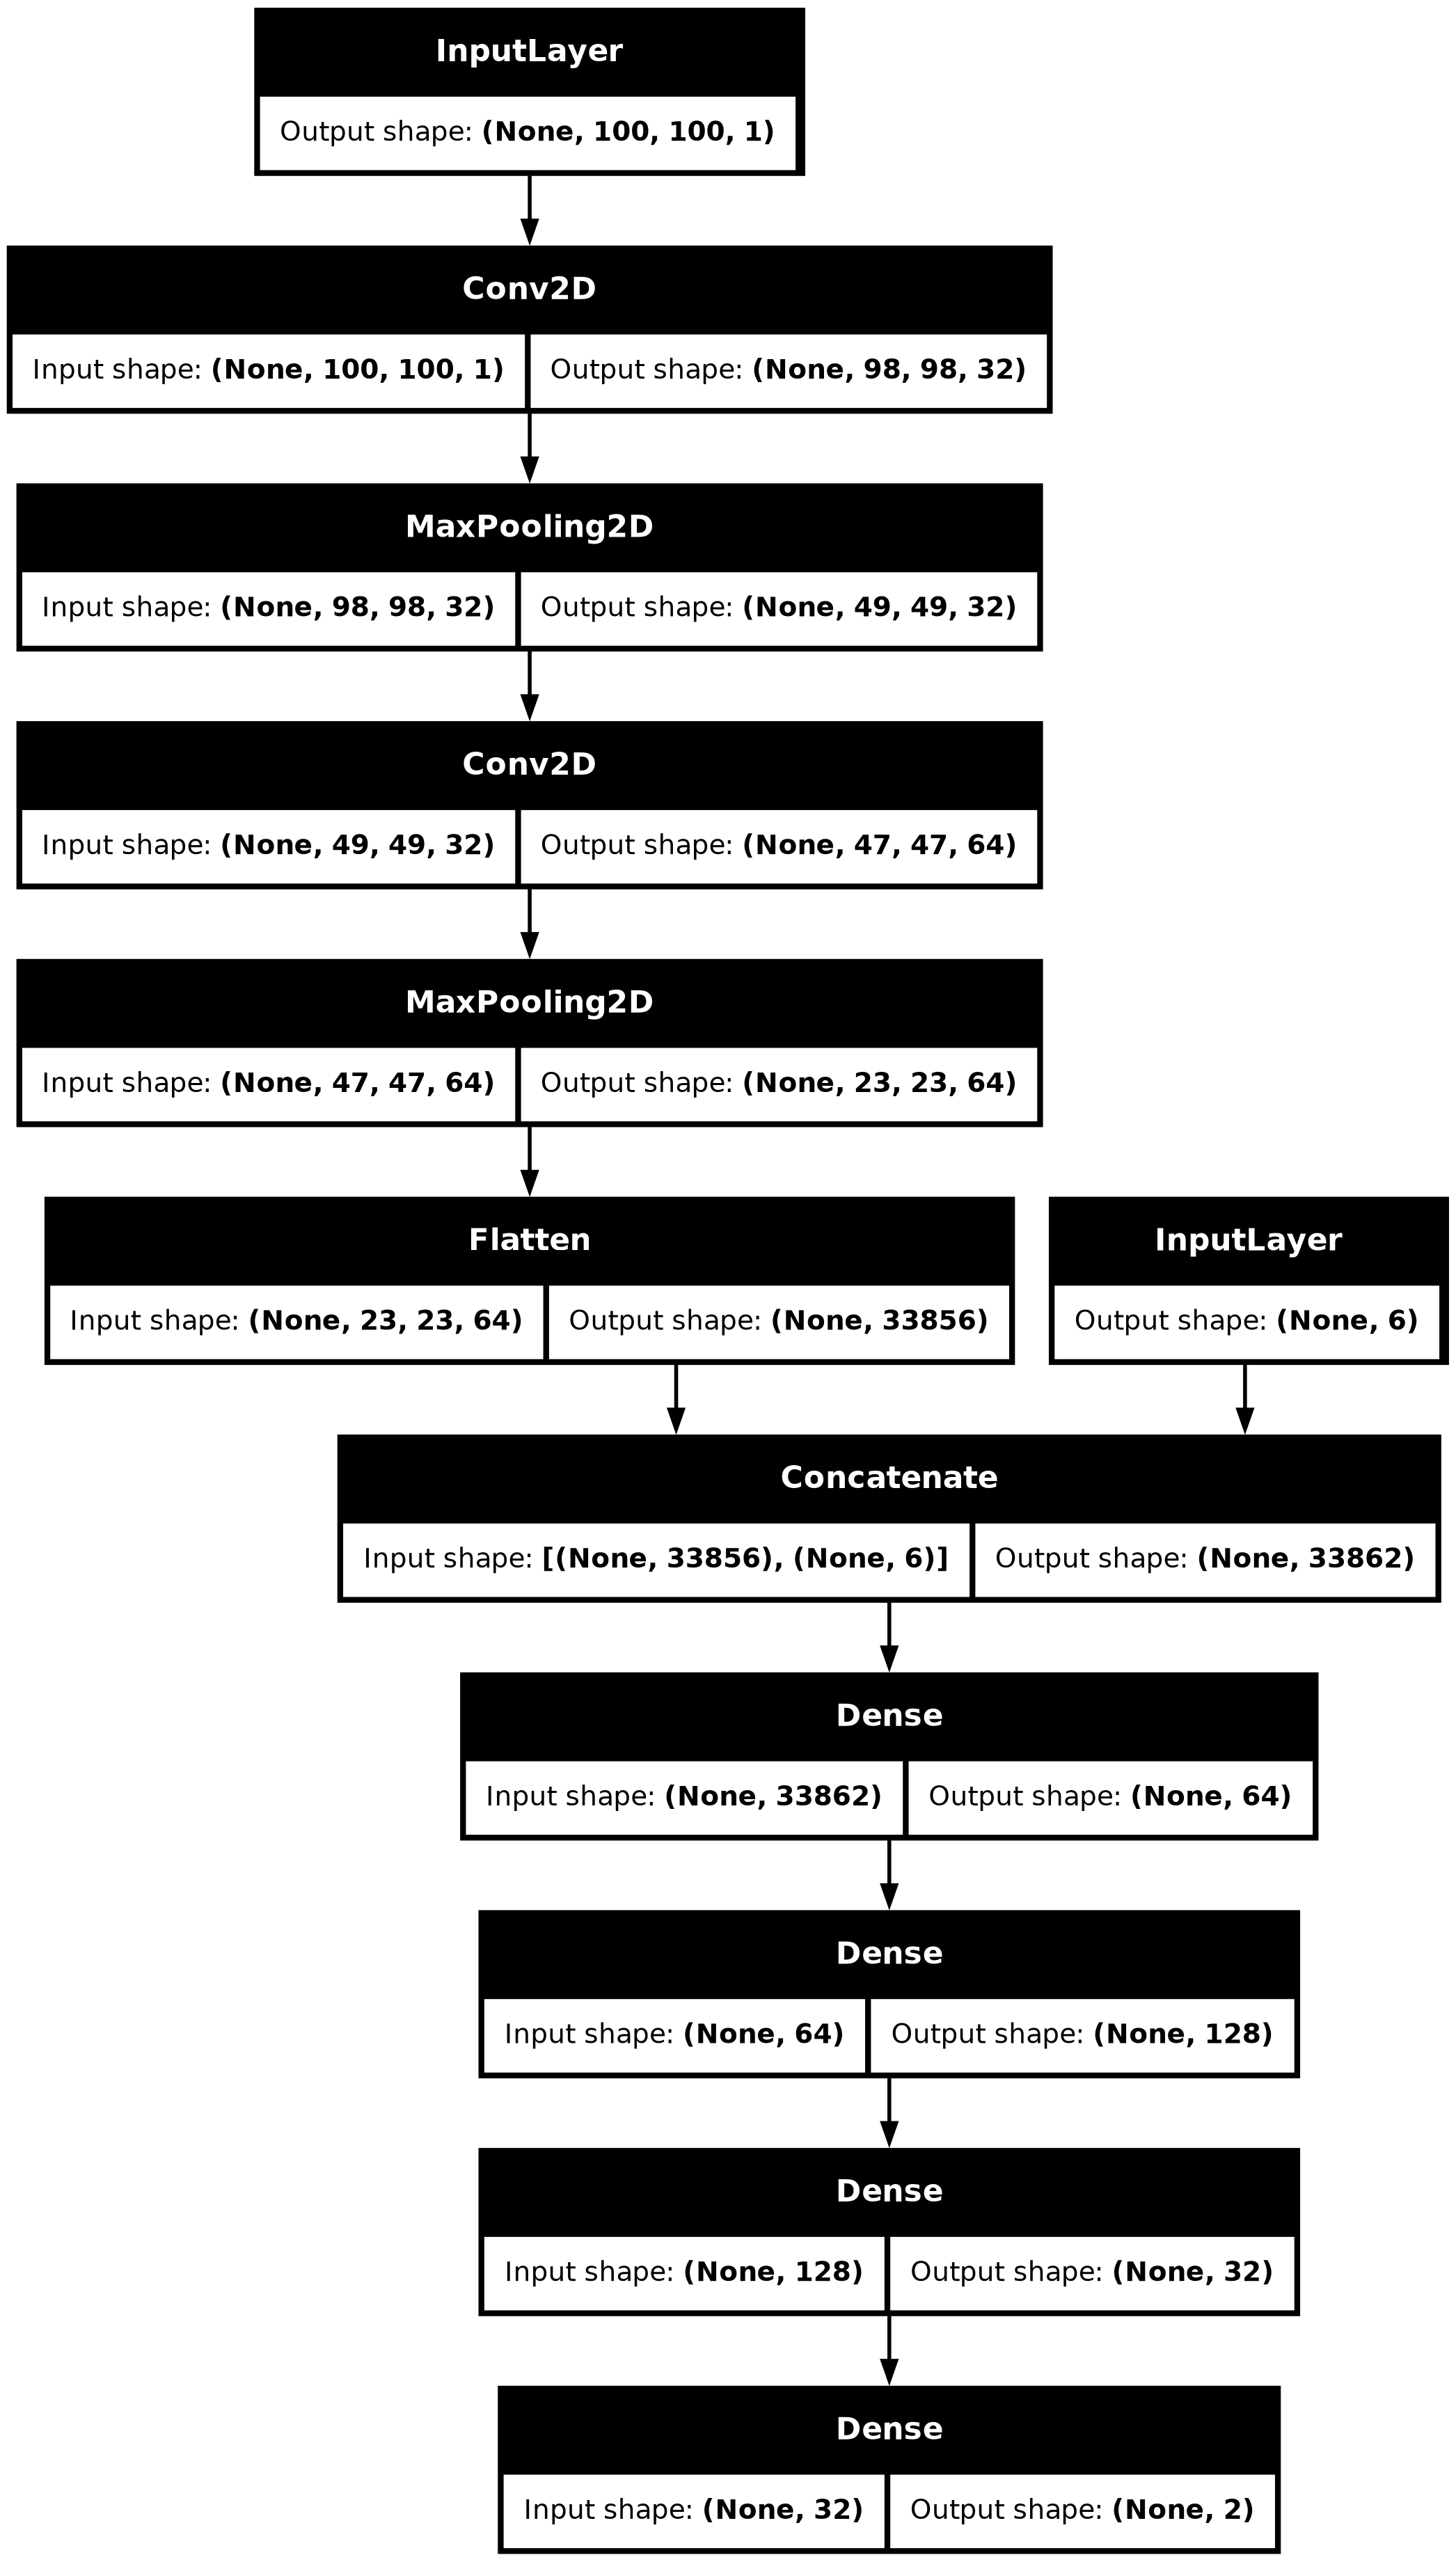

In [54]:
plot_model(model_merge, show_shapes = True)

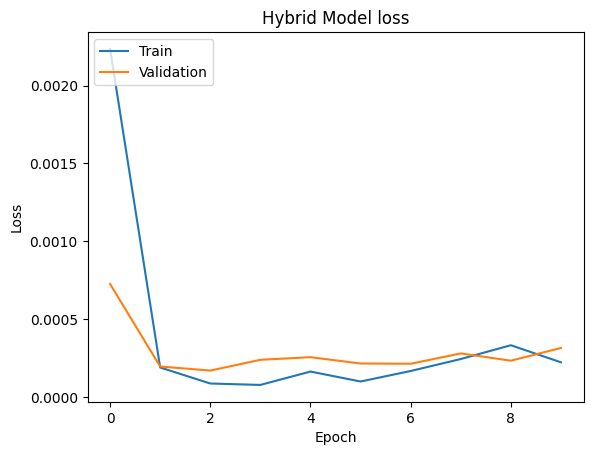

In [106]:
# Plot training & validation loss values
plt.plot(history_model_merge.history['loss'])
plt.plot(history_model_merge.history['val_loss'])
plt.title('Hybrid Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Comparison

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
 1/13 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step

W0000 00:00:1717803645.059674     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


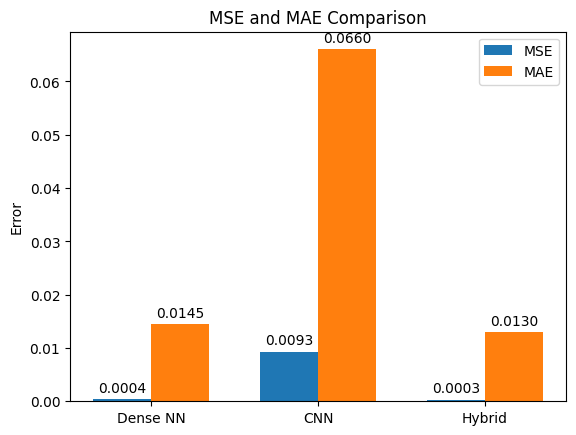

In [107]:
# Comparing the major models in our study
mse_dense = mean_squared_error(y_test, normalized_model1.predict(X_test_tab))
mae_dense = mean_absolute_error(y_test, normalized_model1.predict(X_test_tab))

mse_cnn = mean_squared_error(y_test, model_cnn.predict(X_test_img))
mae_cnn = mean_absolute_error(y_test, model_cnn.predict(X_test_img))

mse_merge = mean_squared_error(y_test, model_merge.predict([X_test_img, X_test_tab]))
mae_merge = mean_absolute_error(y_test, model_merge.predict([X_test_img, X_test_tab]))

# Create bar plot
models = ['Dense NN', 'CNN', 'Hybrid']
mse_values = [mse_dense, mse_cnn, mse_merge]
mae_values = [mae_dense, mae_cnn, mae_merge]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, mse_values, width, label='MSE')
bars2 = ax.bar(x + width/2, mae_values, width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error')
ax.set_title('MSE and MAE Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add labels to the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to the bars
add_labels(bars1)
add_labels(bars2)

plt.show()


In [93]:
# Define the model
normalized_model1_50 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2)  # Output layer with 2 neurons (one for each target variable)
])

# Compile the model
normalized_model1_50.compile(optimizer='adam', loss='mean_squared_error')

begin = time.time()
# Train the model
history_normalized_model1_50 = normalized_model1_50.fit(X_train, y_train_scaled, epochs=50, batch_size=16, validation_data=(X_test, y_test_scaled))
end = time.time()

normalized_model1_50_time = end - begin
print(f"The excecution time required is {normalized_model1_50_time:.2f} seconds")

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6072 - val_loss: 0.0977
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0698 - val_loss: 0.0082
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059 - val_loss: 0.0029
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 - val_loss: 7.2483e-04
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5631e-04 - val_loss: 7.7872e-04
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1504e-04 - val_loss: 5.8065e-04
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5989e-04 - val_loss: 5.1996e-04
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2006e-04 - val_loss: 5.7338e-04
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0308e-04 - val_loss: 4.3421e-04
Epoch 12/50
100/100

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


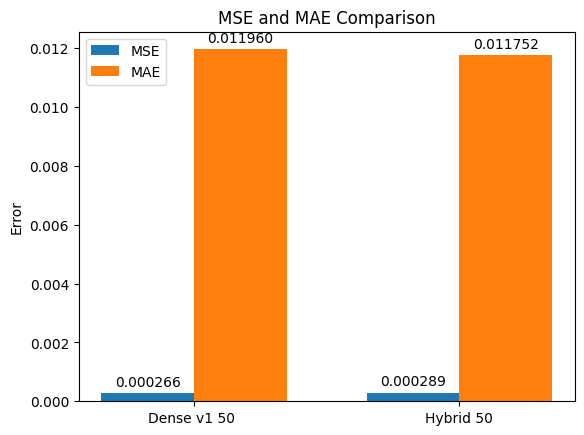

In [97]:
# Comparing the major models in our study
mse_dense_50 = mean_squared_error(y_test, normalized_model1_50.predict(X_test_tab))
mae_dense_50 = mean_absolute_error(y_test, normalized_model1_50.predict(X_test_tab))

mse_merge_50 = mean_squared_error(y_test, model_merge_50.predict([X_test_img, X_test_tab]))
mae_merge_50 = mean_absolute_error(y_test, model_merge_50.predict([X_test_img, X_test_tab]))

# Create bar plot
models = ['Dense v1 50 ', 'Hybrid 50']
mse_values = [mse_dense_50, mse_merge_50]
mae_values = [mae_dense_50, mae_merge_50]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, mse_values, width, label='MSE')
bars2 = ax.bar(x + width/2, mae_values, width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error')
ax.set_title('MSE and MAE Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add labels to the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.6f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to the bars
add_labels(bars1)
add_labels(bars2)

plt.show()


### Choosing the right optimizer 


Epoch 1/10
13/50 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0033 - mean_absolute_error: 0.0379 - mean_squared_error: 0.0033      

W0000 00:00:1717803987.496042     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021 - mean_absolute_error: 0.0298 - mean_squared_error: 0.0021

W0000 00:00:1717803988.596009     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0020 - mean_absolute_error: 0.0297 - mean_squared_error: 0.0020 - val_loss: 2.2337e-04 - val_mean_absolute_error: 0.0114 - val_mean_squared_error: 2.2337e-04
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8758e-04 - mean_absolute_error: 0.0105 - mean_squared_error: 1.8758e-04 - val_loss: 1.6459e-04 - val_mean_absolute_error: 0.0088 - val_mean_squared_error: 1.6459e-04
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2885e-04 - mean_absolute_error: 0.0086 - mean_squared_error: 1.2885e-04 - val_loss: 2.7393e-04 - val_mean_absolute_error: 0.0128 - val_mean_squared_error: 2.7393e-04
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5043e-04 - mean_absolute_error: 0.0096 - mean_squared_error: 1.5043e-04 - val_loss: 2.7103e-04 - val_mean_absolute_error: 0.0126 - val_mean_squared_error: 2.7103e-04
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.4827e-04 - mean_absolute_error: 0.0093 - mean_squa

W0000 00:00:1717803995.501142     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0507e-04 - mean_absolute_error: 0.0120 - mean_squared_error: 3.0507e-04

W0000 00:00:1717803996.375459     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0363e-04 - mean_absolute_error: 0.0120 - mean_squared_error: 3.0363e-04 - val_loss: 2.2223e-04 - val_mean_absolute_error: 0.0109 - val_mean_squared_error: 2.2223e-04
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7723e-04 - mean_absolute_error: 0.0095 - mean_squared_error: 1.7723e-04 - val_loss: 1.9675e-04 - val_mean_absolute_error: 0.0102 - val_mean_squared_error: 1.9675e-04
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4161e-04 - mean_absolute_error: 0.0086 - mean_squared_error: 1.4161e-04 - val_loss: 1.8416e-04 - val_mean_absolute_error: 0.0099 - val_mean_squared_error: 1.8416e-04
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3117e-04 - mean_absolute_error: 0.0085 - mean_squared_error: 1.3117e-04 - val_loss: 1.7589e-04 - val_mean_absolute_error: 0.0096 - val_mean_squared_error: 1.7589e-04
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2804e-04 - mean_absolute_error: 0.0082 - mean_

W0000 00:00:1717804003.296407     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0114 - mean_absolute_error: 0.0620 - mean_squared_error: 0.0114

W0000 00:00:1717804004.281754     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0617 - mean_squared_error: 0.0113 - val_loss: 0.0012 - val_mean_absolute_error: 0.0287 - val_mean_squared_error: 0.0012
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0031 - mean_absolute_error: 0.0418 - mean_squared_error: 0.0031 - val_loss: 0.0051 - val_mean_absolute_error: 0.0606 - val_mean_squared_error: 0.0051
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0029 - mean_absolute_error: 0.0407 - mean_squared_error: 0.0029 - val_loss: 0.0038 - val_mean_absolute_error: 0.0566 - val_mean_squared_error: 0.0038
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0030 - mean_absolute_error: 0.0423 - mean_squared_error: 0.0030 - val_loss: 0.0059 - val_mean_absolute_error: 0.0621 - val_mean_squared_error: 0.0059
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0031 - mean_absolute_error: 0.0421 - mean_squared_error: 0.0031 - val_loss: 0.0112 - val_mean_absolute_err

W0000 00:00:1717804011.382703     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0077 - mean_absolute_error: 0.0514 - mean_squared_error: 0.0077

W0000 00:00:1717804012.363157     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0500 - mean_squared_error: 0.0073 - val_loss: 0.0013 - val_mean_absolute_error: 0.0236 - val_mean_squared_error: 0.0013
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.2520e-04 - mean_absolute_error: 0.0185 - mean_squared_error: 8.2520e-04 - val_loss: 4.0602e-04 - val_mean_absolute_error: 0.0142 - val_mean_squared_error: 4.0602e-04
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6826e-04 - mean_absolute_error: 0.0118 - mean_squared_error: 2.6826e-04 - val_loss: 2.7556e-04 - val_mean_absolute_error: 0.0122 - val_mean_squared_error: 2.7556e-04
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9260e-04 - mean_absolute_error: 0.0105 - mean_squared_error: 1.9260e-04 - val_loss: 2.4405e-04 - val_mean_absolute_error: 0.0115 - val_mean_squared_error: 2.4405e-04
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6919e-04 - mean_absolute_error: 0.0098 - mean_squared_erro

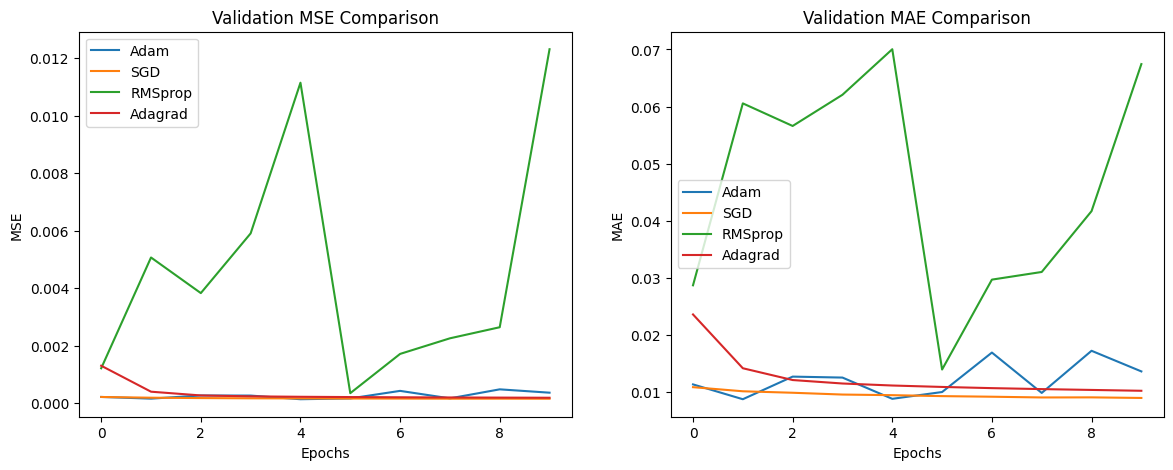

In [109]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

# List of optimizers to evaluate
optimizers = {
    'Adam': Adam(),
    'SGD': SGD(),
    'RMSprop': RMSprop(),
    'Adagrad': Adagrad()
}

# Dictionary to store training histories
histories = {}
training_times = {}

for opt_name, optimizer in optimizers.items():
    # Define the model
    model = Model(inputs=[image_input, tabular_input], outputs=output)
    
    # Compile the model with the current optimizer
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])
    
    # Train the model and record the time
    start_time = time.time()
    history = model.fit([X_train_img, X_train_tab], y_train, epochs=10, batch_size=32, validation_data=([X_test_img, X_test_tab], y_test))
    end_time = time.time()
    
    # Store the history and training time
    histories[opt_name] = history
    training_times[opt_name] = end_time - start_time

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot MSE
for opt_name, history in histories.items():
    ax1.plot(history.history['val_mean_squared_error'], label=f'{opt_name}')
ax1.set_title('Validation MSE Comparison')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')
ax1.legend()

# Plot MAE
for opt_name, history in histories.items():
    ax2.plot(history.history['val_mean_absolute_error'], label=f'{opt_name}')
ax2.set_title('Validation MAE Comparison')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.legend()

plt.show()


## Classification 

In [75]:
df_class = pd.read_excel("/kaggle/input/trussdataset/DataSetTrussStructureContraintes.xlsx")
df_class.head()

,C1,C2,C3,C4,C5,C6,N° image
0,-49413.749818,-55408.642923,0,39179.827147,69881.595161,39179.827147,1
1,-64454.631262,-24232.793281,0,-27591.883860,129900.164436,-6299.320851,2
2,-46291.240662,-53793.898904,0,48328.429233,57418.869607,50211.144062,3
3,-88722.556188,14463.601816,0,1388.186340,123996.252997,15405.208939,4
4,-104616.669276,16680.435366,0,51565.843192,86314.545613,42381.216503,5


In [76]:
df_class.drop(['C3', 'N° image'], axis = 1, inplace = True)

In [77]:
seuil = df_class.values.mean()
print(seuil)

13891.63885072686


In [78]:
seuillage= lambda x : True  if x > seuil else False

In [79]:
df_class1 = df_class.applymap(seuillage)

/tmp/ipykernel_34/1094828219.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_class1 = df_class.applymap(seuillage)


In [80]:
df_class1['classe'] = df_class1["C1"]*df_class1["C2"]*df_class1["C4"]*df_class1["C5"]*df_class1["C6"]

In [81]:
df_class1['classe'] 

0       False
1       False
2       False
3       False
4       False
        ...  
1996    False
1997    False
1998    False
1999    False
2000    False
Name: classe, Length: 2001, dtype: bool

In [82]:
df_class1['classe'].unique()

array([False])

We remark that all our datapoint corresponding to the truss structures don't satisfy the condition of the threshold, which is absurd! Until further explanation of the procedure we will stop our journey right here!